In [1]:
#import
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

 
# Coordinate descend

Implementation coordinate descend for the Mishra’s Bird function.

$$f(x,y)=\sin(y)e^{(1−\cos x)^2} +\cos(x)e^{(1−\sin y)^2} +(x−y)^2$$

with the domain 

$$(x+5)^2+(y+5)^2 < 25$$


In [2]:
# Mishra’s Bird function
def f(x):
    return np.sin(x[1]) * np.exp(1-np.cos(x[0]))**2 + np.cos(x[0])*np.exp(1-np.sin(x[1]))**2 + (x[0]-x[1])**2

#vecfunc = np.vectorize(f)

In [3]:
#Terms of limitation in the circle
def constraint(x):
    if (x[0] + 5)**2 + (x[1] + 5)**2 < 25:
        return True
    else:
        return False

In [4]:
x = np.arange(-10, 0, 0.1)
y = np.arange(-10, 0, 0.1)

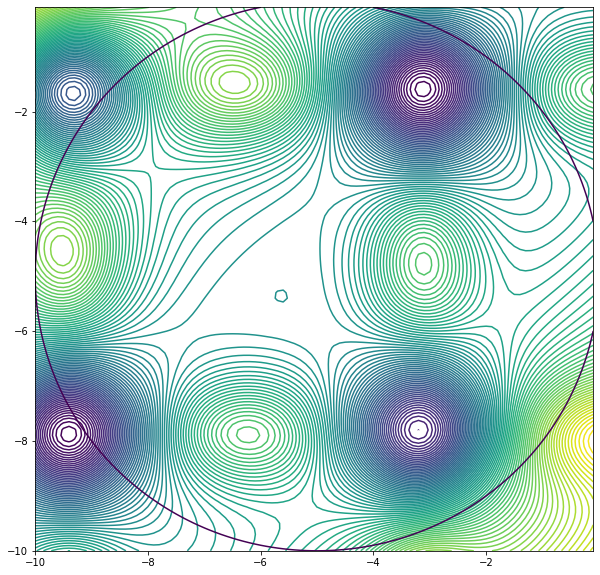

In [5]:
#plot our function
def plot_problem():
    plt.subplots(figsize=(10, 10))

    X, Y = np.meshgrid(x, y)
    Z = np.zeros((x.size, y.size))
    for i in range(x.size):
        for j in range(y.size):
            Z[i, j] = f([x[i], y[j]])

    plt.contour(X, Y, Z.T, 100)
    plt.contour(X, Y, (X + 5)**2 + (Y + 5)**2 - 25, [0])
    plt.show()
plot_problem()

In [10]:
#"Drag" the point in the circle, if it "came out"    
def fit_constraint (X):
    x_v, y_v = X
    if (constraint(X)==False):
        x_0 = -5 
        y_0 = -5
        x = x_0 + 5*(x_v - x_0)/np.sqrt((x_v - x_0)**2 + (y_v - y_0)**2)
        y = y_0 + (x - x_0)*(y_v - y_0)/(x_v - x_0);
        X = [x, y]
    return X

In [11]:
#Initial points
Y_opt = -2
X_opt = -7

#cut ends
a = -10
b = 0

#stop criteria
delta = 0.2
epsilon = 1e-10

max_iter = 200

In [12]:
for j in range(max_iter):
    
    b = -5 + (25 - (Y_opt + 5)**2)**0.5
    a = -5 - (25 - (Y_opt + 5)**2)**0.5
    
    for i in range(max_iter):
        f_1 = f([(a + b)/2 - delta, Y_opt])
        f_2 = f([(a + b)/2 + delta, Y_opt])
        if f_1 < f_2:
            b = (a + b)/2 + delta
        else:
            a = (a + b)/2 - delta
        l = abs(b - a) 
        if l < 2*epsilon:
            break
    X_n = X_opt
    X_opt = (a+b)/2
    
    #new alpha and beta (depend on the circumference)
    b = -5 + (25-(X_opt + 5)**2)**0.5
    a = -5 - (25-(X_opt + 5)**2)**0.5

    for i in range(max_iter):
        f_1 = f([X_opt, (a+b)/2 - delta])
        f_2 = f([X_opt, (a+b)/2 + delta])
        if f_1 < f_2:
            b = (a + b)/2 + delta
        else:
            a = (a + b)/2 - delta
        l = abs(b-a) #length check 
        if l < 2*epsilon:
            break
    Y_n = Y_opt
    Y_opt = (a + b)/2
    #print(X_n, X_opt,Y_n, Y_opt)
    if (abs(X_n - X_opt) < epsilon) & (abs(Y_n - Y_opt)< epsilon): 
        break

print('Oracle calls of Coordinate descend: ', j)
print('Solution:', [X_opt, Y_opt])

Oracle calls of Coordinate descend:  4
Solution: [-3.1998859918273483, -7.7956882957369285]


In [13]:
def Nelder_Mead_2 (alpha, beta, gamma, n, epsilon, maxit, v1, v2, v3):
    #initial points:  
    #initial points:
    """
    point_1 = [np.random.choice(x), np.random.choice(y)]
    point_2 = [np.random.choice(x), np.random.choice(y)]
    point_3 = [np.random.choice(x), np.random.choice(y)]
    """
    
    #v1 = [-5, -5]
    #v2 = [-6, -2]
    #v3 = [-3, -4]

    for i in range(maxit):
        #print(i)
        #sorting:
        V = [[ f(v1),v1],[f(v2),v2], [f(v3),v3]]
        V = sorted(V)
        xl = np.array(V[0][1]) #lowest
        xg = np.array(V[1][1]) #good
        xh = np.array(V[2][1]) #highest

        #center:
        xc = (xg + xl)/2


        #reflection
        xr = xc + alpha * (xc - xh)
        fr = f(xr); fl = f(xl); fg = f(xg); fh = f(xh)

        if(fr < fl):
            xe = (1-gamma)*xc + gamma*xr;     fe = f(xe)
            if(fe < fr):
                xh = xe;
            else:
                xh = xr;          
        elif (fl < fr) & (fr < fg):
            xh = xr;
        else:
            if (fg < fr) & (fr < fh):
                temp = xh; xh = xr; xr = temp;
                temp =fh;  fh = fr; fr = temp;
            xs = beta*xh + (1-beta)*xc; fs = f(xs);
            if (fs<fh):
                xh = xs;
            else:
                xh = xl + (xh-xl)/2;  xg = xl + (xg-xl)/2
        
        v1 = fit_constraint(xl); v2 = fit_constraint(xg); v3 = fit_constraint(xh)
        
    
    #code from: http://code.activestate.com/recipes/576896-3-point-area-finder/    
        def area(a, b, c):
            def distance(p1, p2):
                return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

            side_a = distance(a, b)
            side_b = distance(b, c)
            side_c = distance(c, a)
            s = 0.5 * ( side_a + side_b + side_c)
            return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))
       
        #plt.subplots(figsize=(10, 10)) comment out if you need to look at each triangle separately
        if (area(xl, xg, xh) < epsilon):
            break
    print('Oracle calls of Nelder Mead: ', i)
    print('Solution:', v1)

In [14]:
point_1 = [-2, -6]
point_2 = [-6, -2]
point_3 = [-1, -5]

alpha = 1
beta = 0.5
gamma = 2
n = 3
max_iter =  200 #if we don't find the optimum
epsilon = 1e-10

Nelder_Mead_2 (alpha, beta, gamma, n, epsilon, max_iter, point_1, point_2, point_3)

Oracle calls of Nelder Mead:  59
Solution: [-3.1980224  -7.79755543]


### Conclusion:

Despite the fact that the Nelder Mead method is very beautiful, it needs more iterations Oracle calls to get the same answer as the Coordinate descend. This is probably why this method is not as popular as the others.
